# Kaggle House pricing dataset 
## trying to predict Saleprice using(Linear Regression,Neural Network)

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import keras #to make a neural net
from keras.models import Sequential
from keras.layers import Dense,Activation

In [82]:
# pd.set_option('display.max_rows',1000)
# pd.set_option('display.max_columns',1000)

In [83]:
df = pd.read_csv('train.csv')

In [84]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [85]:
df.shape

(1460, 81)

In [86]:
#first we will see if there is any nan values
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [87]:
# clean our data
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
df.drop(['Alley'],axis=1,inplace=True)
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df.drop(['GarageYrBlt'],axis=1,inplace=True)
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
df.drop(['Id'],axis=1,inplace=True)
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df.dropna(inplace=True)

In [88]:
df.shape

(1422, 75)

In [89]:
# import test data and do the same 
test_df=pd.read_csv('test.csv')
test_df.shape

(1459, 80)

In [90]:
#check null values
test_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [91]:
## Fill Missing Values

test_df['LotFrontage']=test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean())
test_df['MSZoning']=test_df['MSZoning'].fillna(test_df['MSZoning'].mode()[0])
test_df.drop(['Alley'],axis=1,inplace=True)
test_df['BsmtCond']=test_df['BsmtCond'].fillna(test_df['BsmtCond'].mode()[0])
test_df['BsmtQual']=test_df['BsmtQual'].fillna(test_df['BsmtQual'].mode()[0])
test_df['FireplaceQu']=test_df['FireplaceQu'].fillna(test_df['FireplaceQu'].mode()[0])
test_df['GarageType']=test_df['GarageType'].fillna(test_df['GarageType'].mode()[0])
test_df.drop(['GarageYrBlt'],axis=1,inplace=True)
test_df['GarageFinish']=test_df['GarageFinish'].fillna(test_df['GarageFinish'].mode()[0])
test_df['GarageQual']=test_df['GarageQual'].fillna(test_df['GarageQual'].mode()[0])
test_df['GarageCond']=test_df['GarageCond'].fillna(test_df['GarageCond'].mode()[0])

test_df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
test_df.drop(['Id'],axis=1,inplace=True)
test_df['MasVnrType']=test_df['MasVnrType'].fillna(test_df['MasVnrType'].mode()[0])
test_df['MasVnrArea']=test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mode()[0])

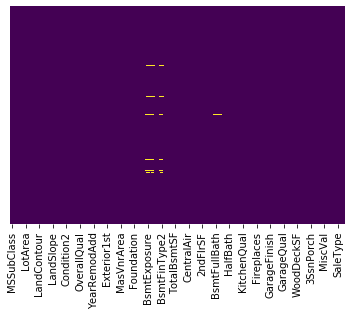

In [92]:
#check nan values using heatmap from seaborn
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [93]:
test_df['BsmtExposure']=test_df['BsmtExposure'].fillna(test_df['BsmtExposure'].mode()[0])

In [94]:
test_df['BsmtFinType2']=test_df['BsmtFinType2'].fillna(test_df['BsmtFinType2'].mode()[0])

In [95]:
test_df['Utilities']=test_df['Utilities'].fillna(test_df['Utilities'].mode()[0])
test_df['Exterior1st']=test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0])
test_df['Exterior2nd']=test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0])
test_df['BsmtFinType1']=test_df['BsmtFinType1'].fillna(test_df['BsmtFinType1'].mode()[0])
test_df['BsmtFinSF1']=test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].mean())
test_df['BsmtFinSF2']=test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].mean())
test_df['BsmtUnfSF']=test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].mean())
test_df['TotalBsmtSF']=test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mean())
test_df['BsmtFullBath']=test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mode()[0])
test_df['BsmtHalfBath']=test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].mode()[0])
test_df['KitchenQual']=test_df['KitchenQual'].fillna(test_df['KitchenQual'].mode()[0])
test_df['Functional']=test_df['Functional'].fillna(test_df['Functional'].mode()[0])
test_df['GarageCars']=test_df['GarageCars'].fillna(test_df['GarageCars'].mean())
test_df['GarageArea']=test_df['GarageArea'].fillna(test_df['GarageArea'].mean())
test_df['SaleType']=test_df['SaleType'].fillna(test_df['SaleType'].mode()[0])

In [96]:
test_df.shape

(1459, 74)

In [97]:
#now we want to deal with the categorical data
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [98]:
len(columns)

39

In [99]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [100]:
#lets concatenate both test and train data
final_df=pd.concat([df,test_df],axis=0)

F:\Anacondaaa\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [101]:
final_df.shape

(2881, 75)

In [102]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [103]:
final_df.shape

(2881, 235)

In [104]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [105]:
final_df.shape

(2881, 175)

In [106]:
df_Train=final_df.iloc[:1422,:]
df_Test=final_df.iloc[1422:,:]

In [107]:
df_Test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,Lvl,NoSeWa,CulDSac,FR2,FR3,Inside,Mod,Sev,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,2fmCon,Duplex,Twnhs,TwnhsE,RRNe,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial,Fa,Gd,Po,TA,CBlock,PConc,Slab,Stone,Wood,Mn,No,BLQ,GLQ,LwQ,Rec,Unf,Gable,Gambrel,Hip,Mansard,Shed,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,AsphShn,BrkComm,BrkFace,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stucco,VinylSd,Wd Sdng,WdShing,Brk Cmn,CmentBd,Other,Wd Shng,None,GasW,Grav,OthW,Wall,Y,FuseF,FuseP,Mix,SBrkr,Maj2,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,896,0,0,2,468.0,144.0,0.0,0.0,270.0,0,0,1,730.0,1.0,896,0,1,11622,80.0,0,20,0.0,0,6,0,6,5,0,NaN,120,5,882.0,140,1961,1961,2010,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
1,1329,0,0,3,923.0,0.0,0.0,0.0,406.0,0,0,1,312.0,1.0,1329,1,1,14267,81.0,0,20,108.0,12500,6,36,6,6,0,NaN,0,6,1329.0,393,1958,1958,2010,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
2,928,701,0,3,791.0,0.0,0.0,0.0,137.0,0,1,2,482.0,2.0,1629,1,1,13830,74.0,0,60,0.0,0,3,34,5,5,0,NaN,0,6,928.0,212,1997,1998,2010,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
3,926,678,0,3,602.0,0.0,0.0,0.0,324.0,0,1,2,470.0,2.0,1604,1,1,9978,78.0,0,60,20.0,0,6,36,6,6,0,NaN,0,7,926.0,360,1998,1998,2010,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
4,1280,0,0,2,263.0,0.0,0.0,0.0,1017.0,0,0,2,506.0,2.0,1280,0,1,5005,43.0,0,120,0.0,0,1,82,5,8,0,NaN,144,5,1280.0,0,1992,1992,2010,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0


In [108]:
df_Test.shape

(1459, 175)

In [109]:
df_Train.shape

(1422, 175)

In [110]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

F:\Anacondaaa\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [111]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

# First we will use Linear Regression

In [112]:
# now we will use the Linear regression 
from sklearn.linear_model import LinearRegression

In [113]:
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(df_Test)

In [114]:
y_pred

array([128846.19384762, 169927.33528765, 184874.85549199, ...,
       175475.61559544, 105014.76685818, 239800.93266636])

In [117]:
X_train.shape

(1422, 174)

# Now let's try using Neural Network(NN)

In [165]:
# Now we will use keras to make a Neural Network 
model = Sequential()
model.add(Dense(174, activation='relu', input_shape=(174,)))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(optimizer='Adam',loss='mean_squared_error')

In [166]:
model.fit(X_train.values,y_train.values,validation_split=0.20,batch_size=50,nb_epoch=2000)

F:\Anacondaaa\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 1137 samples, validate on 285 samples
Epoch 1/2000
1137/1137 [==============================] - 0s 256us/step - loss: 35613509437.4670 - val_loss: 25508634480.2807
Epoch 2/2000
1137/1137 [==============================] - 0s 79us/step - loss: 15207578175.9437 - val_loss: 6639646684.0702
Epoch 3/2000
1137/1137 [==============================] - 0s 75us/step - loss: 8506450993.9842 - val_loss: 5379488291.9298
Epoch 4/2000
1137/1137 [==============================] - 0s 86us/step - loss: 5371276583.8522 - val_loss: 4583253629.7544
Epoch 5/2000
1137/1137 [==============================] - 0s 82us/step - loss: 4262246302.9587 - val_loss: 4310864213.3333
Epoch 6/2000
1137/1137 [==============================] - 0s 80us/step - loss: 3728208905.6816 - val_loss: 4358513425.9649
Epoch 7/2000
1137/1137 [==============================] - 0s 81us/step - loss: 3397703305.1187 - val_loss: 3938915072.0000
Epoch 8/2000
1137/1137 [==============================] - 0s 82us/step - loss: 303246960

1137/1137 [==============================] - 0s 63us/step - loss: 1465755483.6939 - val_loss: 3543583435.2281
Epoch 67/2000
1137/1137 [==============================] - 0s 69us/step - loss: 1403590685.7203 - val_loss: 3649820317.1930
Epoch 68/2000
1137/1137 [==============================] - 0s 80us/step - loss: 1392418256.9991 - val_loss: 3045954007.5789
Epoch 69/2000
1137/1137 [==============================] - 0s 94us/step - loss: 1361950016.7880 - val_loss: 3064125744.2807
Epoch 70/2000
1137/1137 [==============================] - 0s 98us/step - loss: 1354584648.0493 - val_loss: 3186801032.9825
Epoch 71/2000
1137/1137 [==============================] - 0s 90us/step - loss: 1509335575.7537 - val_loss: 2866069643.2281
Epoch 72/2000
1137/1137 [==============================] - 0s 74us/step - loss: 1426928159.1838 - val_loss: 3039122993.4035
Epoch 73/2000
1137/1137 [==============================] - 0s 82us/step - loss: 1394532138.5541 - val_loss: 3064134551.5789
Epoch 74/2000
1137/113

Epoch 132/2000
1137/1137 [==============================] - 0s 98us/step - loss: 1193599658.6104 - val_loss: 2572864392.9825
Epoch 133/2000
1137/1137 [==============================] - 0s 89us/step - loss: 1222366489.6675 - val_loss: 2436642610.5263
Epoch 134/2000
1137/1137 [==============================] - 0s 71us/step - loss: 1167502175.7467 - val_loss: 2435369101.4737
Epoch 135/2000
1137/1137 [==============================] - 0s 74us/step - loss: 1150285068.2709 - val_loss: 2328166225.9649
Epoch 136/2000
1137/1137 [==============================] - 0s 72us/step - loss: 1125199518.2832 - val_loss: 2483835183.1579
Epoch 137/2000
1137/1137 [==============================] - 0s 72us/step - loss: 1107041057.3791 - val_loss: 2379433496.7018
Epoch 138/2000
1137/1137 [==============================] - 0s 72us/step - loss: 1128797887.7748 - val_loss: 2409143967.4386
Epoch 139/2000
1137/1137 [==============================] - 0s 72us/step - loss: 1290265225.2313 - val_loss: 2340444484.4912


1137/1137 [==============================] - 0s 72us/step - loss: 898544807.8522 - val_loss: 1937372420.4912
Epoch 198/2000
1137/1137 [==============================] - 0s 76us/step - loss: 895720872.6684 - val_loss: 1831959367.8596
Epoch 199/2000
1137/1137 [==============================] - 0s 71us/step - loss: 899079161.4705 - val_loss: 1979853697.6842
Epoch 200/2000
1137/1137 [==============================] - 0s 73us/step - loss: 908074929.4776 - val_loss: 1861760325.6140
Epoch 201/2000
1137/1137 [==============================] - 0s 72us/step - loss: 1021331038.7335 - val_loss: 1916967305.5439
Epoch 202/2000
1137/1137 [==============================] - 0s 73us/step - loss: 933030898.9974 - val_loss: 1937938464.5614
Epoch 203/2000
1137/1137 [==============================] - 0s 76us/step - loss: 895527832.7669 - val_loss: 1775160602.3860
Epoch 204/2000
1137/1137 [==============================] - 0s 71us/step - loss: 860605296.3237 - val_loss: 1855050674.5263
Epoch 205/2000
1137/11

1137/1137 [==============================] - 0s 75us/step - loss: 584375497.8786 - val_loss: 1338491896.1404
Epoch 264/2000
1137/1137 [==============================] - 0s 75us/step - loss: 625412686.6913 - val_loss: 1319488275.6491
Epoch 265/2000
1137/1137 [==============================] - 0s 85us/step - loss: 593602300.5664 - val_loss: 1301890928.8421
Epoch 266/2000
1137/1137 [==============================] - 0s 80us/step - loss: 602894388.9112 - val_loss: 1389724737.6842
Epoch 267/2000
1137/1137 [==============================] - 0s 75us/step - loss: 582400203.8206 - val_loss: 1370878301.1930
Epoch 268/2000
1137/1137 [==============================] - 0s 72us/step - loss: 633847380.7142 - val_loss: 1311203644.6316
Epoch 269/2000
1137/1137 [==============================] - 0s 73us/step - loss: 585907159.7256 - val_loss: 1302248556.9123
Epoch 270/2000
1137/1137 [==============================] - 0s 84us/step - loss: 568028713.1469 - val_loss: 1350042757.6140
Epoch 271/2000
1137/113

1137/1137 [==============================] - 0s 75us/step - loss: 495474357.1363 - val_loss: 1122079660.3509
Epoch 330/2000
1137/1137 [==============================] - 0s 75us/step - loss: 489415021.7062 - val_loss: 1129738073.2632
Epoch 331/2000
1137/1137 [==============================] - 0s 72us/step - loss: 473978412.5242 - val_loss: 1157513657.8246
Epoch 332/2000
1137/1137 [==============================] - 0s 75us/step - loss: 472582662.9798 - val_loss: 1140701716.2105
Epoch 333/2000
1137/1137 [==============================] - 0s 75us/step - loss: 465962357.6429 - val_loss: 1096268972.9123
Epoch 334/2000
1137/1137 [==============================] - 0s 73us/step - loss: 412390552.1759 - val_loss: 1174253408.5614
Epoch 335/2000
1137/1137 [==============================] - 0s 76us/step - loss: 427256244.2076 - val_loss: 1191686804.2105
Epoch 336/2000
1137/1137 [==============================] - 0s 73us/step - loss: 435121170.2938 - val_loss: 1102669352.4211
Epoch 337/2000
1137/113

1137/1137 [==============================] - 0s 81us/step - loss: 361941311.9156 - val_loss: 1192335047.2982
Epoch 396/2000
1137/1137 [==============================] - 0s 88us/step - loss: 446599902.6772 - val_loss: 1062927654.7368
Epoch 397/2000
1137/1137 [==============================] - 0s 81us/step - loss: 527218794.5541 - val_loss: 1226975624.9825
Epoch 398/2000
1137/1137 [==============================] - 0s 78us/step - loss: 434205846.3747 - val_loss: 1179134226.5263
Epoch 399/2000
1137/1137 [==============================] - 0s 84us/step - loss: 354069829.5444 - val_loss: 1219775951.1579
Epoch 400/2000
1137/1137 [==============================] - 0s 87us/step - loss: 385370979.9402 - val_loss: 1086452219.5088
Epoch 401/2000
1137/1137 [==============================] - 0s 85us/step - loss: 352028973.7907 - val_loss: 1082073233.4035
Epoch 402/2000
1137/1137 [==============================] - 0s 81us/step - loss: 358673958.6702 - val_loss: 1083913012.2105
Epoch 403/2000
1137/113

Epoch 461/2000
1137/1137 [==============================] - 0s 80us/step - loss: 303142062.7757 - val_loss: 1017661373.7544
Epoch 462/2000
1137/1137 [==============================] - 0s 76us/step - loss: 326294027.3421 - val_loss: 1077003634.5263
Epoch 463/2000
1137/1137 [==============================] - 0s 84us/step - loss: 299406436.1935 - val_loss: 1133639915.7895
Epoch 464/2000
1137/1137 [==============================] - 0s 75us/step - loss: 293819003.2577 - val_loss: 1182889831.2982
Epoch 465/2000
1137/1137 [==============================] - 0s 105us/step - loss: 308273290.3149 - val_loss: 1231875036.6316
Epoch 466/2000
1137/1137 [==============================] - 0s 73us/step - loss: 331142512.8725 - val_loss: 1230656897.6842
Epoch 467/2000
1137/1137 [==============================] - 0s 80us/step - loss: 330117025.4354 - val_loss: 1109338558.8772
Epoch 468/2000
1137/1137 [==============================] - 0s 78us/step - loss: 287956519.4582 - val_loss: 1142088334.0351
Epoch 4

1137/1137 [==============================] - 0s 73us/step - loss: 262405454.4943 - val_loss: 1148599233.6842
Epoch 528/2000
1137/1137 [==============================] - 0s 73us/step - loss: 274657623.0079 - val_loss: 1033442053.6140
Epoch 529/2000
1137/1137 [==============================] - 0s 73us/step - loss: 234907875.2084 - val_loss: 1066987658.6667
Epoch 530/2000
1137/1137 [==============================] - 0s 72us/step - loss: 262425023.2612 - val_loss: 1151375109.6140
Epoch 531/2000
1137/1137 [==============================] - 0s 73us/step - loss: 271543157.4459 - val_loss: 1080816316.0702
Epoch 532/2000
1137/1137 [==============================] - 0s 72us/step - loss: 388898025.3720 - val_loss: 992573804.9123
Epoch 533/2000
1137/1137 [==============================] - 0s 80us/step - loss: 338868600.2322 - val_loss: 1127196981.3333
Epoch 534/2000
1137/1137 [==============================] - 0s 82us/step - loss: 271630116.1653 - val_loss: 1002963010.8070
Epoch 535/2000
1137/1137

Epoch 593/2000
1137/1137 [==============================] - 0s 81us/step - loss: 256554094.1143 - val_loss: 1084649948.6316
Epoch 594/2000
1137/1137 [==============================] - 0s 79us/step - loss: 227278051.8839 - val_loss: 1034236148.7719
Epoch 595/2000
1137/1137 [==============================] - 0s 86us/step - loss: 214404567.9930 - val_loss: 1123995312.2807
Epoch 596/2000
1137/1137 [==============================] - 0s 85us/step - loss: 230782848.4644 - val_loss: 1059602129.4035
Epoch 597/2000
1137/1137 [==============================] - 0s 103us/step - loss: 218067272.0352 - val_loss: 1084297041.9649
Epoch 598/2000
1137/1137 [==============================] - 0s 106us/step - loss: 223170071.2612 - val_loss: 1074485943.5789
Epoch 599/2000
1137/1137 [==============================] - 0s 104us/step - loss: 224409542.5154 - val_loss: 1069599929.8246
Epoch 600/2000
1137/1137 [==============================] - 0s 105us/step - loss: 297681176.9780 - val_loss: 1086971079.2982
Epoc

1137/1137 [==============================] - 0s 76us/step - loss: 204158425.8083 - val_loss: 1123497676.9123
Epoch 660/2000
1137/1137 [==============================] - 0s 87us/step - loss: 189941937.4916 - val_loss: 1073912596.2105
Epoch 661/2000
1137/1137 [==============================] - 0s 82us/step - loss: 219691110.5506 - val_loss: 1169360463.1579
Epoch 662/2000
1137/1137 [==============================] - 0s 74us/step - loss: 242944444.5805 - val_loss: 1156944771.3684
Epoch 663/2000
1137/1137 [==============================] - 0s 79us/step - loss: 236294478.4661 - val_loss: 1113548552.4211
Epoch 664/2000
1137/1137 [==============================] - 0s 76us/step - loss: 200107069.5796 - val_loss: 1119012793.2632
Epoch 665/2000
1137/1137 [==============================] - 0s 78us/step - loss: 210584903.5004 - val_loss: 1131200769.6842
Epoch 666/2000
1137/1137 [==============================] - 0s 72us/step - loss: 201515170.2656 - val_loss: 1198715955.6491
Epoch 667/2000
1137/113

1137/1137 [==============================] - 0s 75us/step - loss: 219739524.6297 - val_loss: 1116128862.3158
Epoch 726/2000
1137/1137 [==============================] - 0s 75us/step - loss: 188523960.2603 - val_loss: 1066132835.3684
Epoch 727/2000
1137/1137 [==============================] - 0s 74us/step - loss: 190056662.9094 - val_loss: 1140111692.9123
Epoch 728/2000
1137/1137 [==============================] - 0s 74us/step - loss: 215960668.6931 - val_loss: 1153926125.4737
Epoch 729/2000
1137/1137 [==============================] - 0s 73us/step - loss: 207210835.1803 - val_loss: 1075725408.5614
Epoch 730/2000
1137/1137 [==============================] - 0s 81us/step - loss: 198149251.2929 - val_loss: 1117491888.2807
Epoch 731/2000
1137/1137 [==============================] - 0s 88us/step - loss: 185369419.5954 - val_loss: 1179284083.6491
Epoch 732/2000
1137/1137 [==============================] - 0s 81us/step - loss: 184156056.3518 - val_loss: 1148394693.0526
Epoch 733/2000
1137/113

1137/1137 [==============================] - 0s 73us/step - loss: 194113033.0976 - val_loss: 1130467238.1754
Epoch 792/2000
1137/1137 [==============================] - 0s 77us/step - loss: 180830528.3729 - val_loss: 1183518430.3158
Epoch 793/2000
1137/1137 [==============================] - 0s 73us/step - loss: 152894491.6376 - val_loss: 1107293034.1053
Epoch 794/2000
1137/1137 [==============================] - 0s 69us/step - loss: 158849027.2788 - val_loss: 1144019498.6667
Epoch 795/2000
1137/1137 [==============================] - 0s 71us/step - loss: 186039525.6851 - val_loss: 1152644134.7368
Epoch 796/2000
1137/1137 [==============================] - 0s 73us/step - loss: 159204142.0440 - val_loss: 1117488092.6316
Epoch 797/2000
1137/1137 [==============================] - 0s 75us/step - loss: 189446492.4679 - val_loss: 1103764638.3158
Epoch 798/2000
1137/1137 [==============================] - 0s 73us/step - loss: 165226674.2375 - val_loss: 1237698576.2807
Epoch 799/2000
1137/113

1137/1137 [==============================] - 0s 74us/step - loss: 165941281.3650 - val_loss: 1100526468.4912
Epoch 858/2000
1137/1137 [==============================] - 0s 72us/step - loss: 153276920.7810 - val_loss: 1082190668.3509
Epoch 859/2000
1137/1137 [==============================] - 0s 72us/step - loss: 143042754.3008 - val_loss: 1094241729.6842
Epoch 860/2000
1137/1137 [==============================] - 0s 73us/step - loss: 142622160.6192 - val_loss: 1121225864.4211
Epoch 861/2000
1137/1137 [==============================] - 0s 73us/step - loss: 144911661.9173 - val_loss: 1097830531.3684
Epoch 862/2000
1137/1137 [==============================] - 0s 73us/step - loss: 167484582.4028 - val_loss: 1104186432.5614
Epoch 863/2000
1137/1137 [==============================] - 0s 72us/step - loss: 154463328.8091 - val_loss: 1125500702.8772
Epoch 864/2000
1137/1137 [==============================] - 0s 72us/step - loss: 167664524.0950 - val_loss: 1206311257.8246
Epoch 865/2000
1137/113

1137/1137 [==============================] - 0s 80us/step - loss: 171596216.5136 - val_loss: 1230299633.9649
Epoch 924/2000
1137/1137 [==============================] - 0s 98us/step - loss: 140035377.0765 - val_loss: 1158672951.5789
Epoch 925/2000
1137/1137 [==============================] - 0s 84us/step - loss: 128142137.0554 - val_loss: 1106474735.1579
Epoch 926/2000
1137/1137 [==============================] - 0s 80us/step - loss: 205469294.1847 - val_loss: 1479268235.7895
Epoch 927/2000
1137/1137 [==============================] - 0s 83us/step - loss: 242622743.8663 - val_loss: 1140052889.8246
Epoch 928/2000
1137/1137 [==============================] - 0s 82us/step - loss: 148858857.9349 - val_loss: 1182664168.9825
Epoch 929/2000
1137/1137 [==============================] - 0s 82us/step - loss: 163306689.5409 - val_loss: 1120619718.7368
Epoch 930/2000
1137/1137 [==============================] - 0s 82us/step - loss: 162986692.3272 - val_loss: 1154231631.7193
Epoch 931/2000
1137/113

Epoch 989/2000
1137/1137 [==============================] - 0s 93us/step - loss: 138454554.2234 - val_loss: 1163176326.1754
Epoch 990/2000
1137/1137 [==============================] - 0s 92us/step - loss: 129790457.8857 - val_loss: 1187486379.7895
Epoch 991/2000
1137/1137 [==============================] - 0s 87us/step - loss: 155952913.7449 - val_loss: 1150329653.8947
Epoch 992/2000
1137/1137 [==============================] - 0s 87us/step - loss: 135786058.8496 - val_loss: 1219846138.9474
Epoch 993/2000
1137/1137 [==============================] - 0s 87us/step - loss: 126931650.6315 - val_loss: 1204141459.0877
Epoch 994/2000
1137/1137 [==============================] - 0s 78us/step - loss: 127155523.8487 - val_loss: 1188128149.3333
Epoch 995/2000
1137/1137 [==============================] - 0s 83us/step - loss: 128148643.1240 - val_loss: 1193640172.9123
Epoch 996/2000
1137/1137 [==============================] - 0s 78us/step - loss: 131515166.8461 - val_loss: 1196041457.4035
Epoch 99

1137/1137 [==============================] - 0s 83us/step - loss: 149833672.9428 - val_loss: 1203022294.4561
Epoch 1055/2000
1137/1137 [==============================] - 0s 87us/step - loss: 127168302.4239 - val_loss: 1200062409.5439
Epoch 1056/2000
1137/1137 [==============================] - 0s 87us/step - loss: 144250457.2665 - val_loss: 1210454021.0526
Epoch 1057/2000
1137/1137 [==============================] - 0s 98us/step - loss: 137719605.0660 - val_loss: 1214433210.3860
Epoch 1058/2000
1137/1137 [==============================] - 0s 103us/step - loss: 139362654.5224 - val_loss: 1167512934.1754
Epoch 1059/2000
1137/1137 [==============================] - 0s 104us/step - loss: 135771040.7740 - val_loss: 1201387864.7018
Epoch 1060/2000
1137/1137 [==============================] - 0s 104us/step - loss: 121845673.6007 - val_loss: 1216227806.8772
Epoch 1061/2000
1137/1137 [==============================] - 0s 98us/step - loss: 116733844.3694 - val_loss: 1176732641.6842
Epoch 1062/20

1137/1137 [==============================] - 0s 89us/step - loss: 123574139.4406 - val_loss: 1210356005.6140
Epoch 1120/2000
1137/1137 [==============================] - 0s 90us/step - loss: 109650800.3518 - val_loss: 1234840897.1228
Epoch 1121/2000
1137/1137 [==============================] - 0s 84us/step - loss: 125674689.2806 - val_loss: 1188760769.6842
Epoch 1122/2000
1137/1137 [==============================] - 0s 83us/step - loss: 108956348.9041 - val_loss: 1166966172.6316
Epoch 1123/2000
1137/1137 [==============================] - 0s 78us/step - loss: 153263342.4943 - val_loss: 1435609155.3684
Epoch 1124/2000
1137/1137 [==============================] - 0s 74us/step - loss: 301903384.4573 - val_loss: 1539169003.7895
Epoch 1125/2000
1137/1137 [==============================] - 0s 75us/step - loss: 198327759.2753 - val_loss: 1201289190.1754
Epoch 1126/2000
1137/1137 [==============================] - 0s 74us/step - loss: 151068276.2709 - val_loss: 1230372691.6491
Epoch 1127/2000


Epoch 1185/2000
1137/1137 [==============================] - 0s 80us/step - loss: 119790287.8382 - val_loss: 1204813414.1754
Epoch 1186/2000
1137/1137 [==============================] - 0s 81us/step - loss: 134448445.1856 - val_loss: 1230740974.0351
Epoch 1187/2000
1137/1137 [==============================] - 0s 85us/step - loss: 117424778.9692 - val_loss: 1343745547.2281
Epoch 1188/2000
1137/1137 [==============================] - 0s 75us/step - loss: 126931369.1539 - val_loss: 1312153237.8947
Epoch 1189/2000
1137/1137 [==============================] - 0s 73us/step - loss: 132451095.8171 - val_loss: 1216045658.9474
Epoch 1190/2000
1137/1137 [==============================] - 0s 73us/step - loss: 95520916.2498 - val_loss: 1212425006.0351
Epoch 1191/2000
1137/1137 [==============================] - 0s 75us/step - loss: 95474898.1179 - val_loss: 1211452047.7193
Epoch 1192/2000
1137/1137 [==============================] - 0s 76us/step - loss: 130825467.9191 - val_loss: 1271444257.6842
Ep

1137/1137 [==============================] - 0s 93us/step - loss: 86860858.9270 - val_loss: 1253925273.8246
Epoch 1251/2000
1137/1137 [==============================] - 0s 88us/step - loss: 82403843.4195 - val_loss: 1265130080.5614
Epoch 1252/2000
1137/1137 [==============================] - 0s 85us/step - loss: 84121167.4653 - val_loss: 1207651964.6316
Epoch 1253/2000
1137/1137 [==============================] - 0s 87us/step - loss: 98899080.7071 - val_loss: 1355356596.7719
Epoch 1254/2000
1137/1137 [==============================] - 0s 83us/step - loss: 98594332.8619 - val_loss: 1250929127.2982
Epoch 1255/2000
1137/1137 [==============================] - 0s 86us/step - loss: 85254478.1179 - val_loss: 1232399512.7018
Epoch 1256/2000
1137/1137 [==============================] - 0s 83us/step - loss: 77812730.9200 - val_loss: 1209150151.8596
Epoch 1257/2000
1137/1137 [==============================] - 0s 85us/step - loss: 79422201.2524 - val_loss: 1204358039.0175
Epoch 1258/2000
1137/113

Epoch 1316/2000
1137/1137 [==============================] - 0s 75us/step - loss: 89302627.2929 - val_loss: 1259721534.8772
Epoch 1317/2000
1137/1137 [==============================] - 0s 81us/step - loss: 89543922.4415 - val_loss: 1186220029.7544
Epoch 1318/2000
1137/1137 [==============================] - 0s 81us/step - loss: 77609205.1082 - val_loss: 1213286333.7544
Epoch 1319/2000
1137/1137 [==============================] - 0s 77us/step - loss: 75586231.3949 - val_loss: 1224696754.5263
Epoch 1320/2000
1137/1137 [==============================] - 0s 85us/step - loss: 83567885.9912 - val_loss: 1235639040.0000
Epoch 1321/2000
1137/1137 [==============================] - 0s 76us/step - loss: 84426424.1759 - val_loss: 1231056020.2105
Epoch 1322/2000
1137/1137 [==============================] - 0s 75us/step - loss: 89517877.2419 - val_loss: 1192064651.2281
Epoch 1323/2000
1137/1137 [==============================] - 0s 76us/step - loss: 96334812.7493 - val_loss: 1229773246.8772
Epoch 13

Epoch 1382/2000
1137/1137 [==============================] - 0s 78us/step - loss: 75780222.2551 - val_loss: 1243840090.9474
Epoch 1383/2000
1137/1137 [==============================] - 0s 73us/step - loss: 76213064.8830 - val_loss: 1248687842.8070
Epoch 1384/2000
1137/1137 [==============================] - 0s 74us/step - loss: 70627003.5391 - val_loss: 1223309996.9123
Epoch 1385/2000
1137/1137 [==============================] - 0s 72us/step - loss: 72962692.9041 - val_loss: 1229347210.1053
Epoch 1386/2000
1137/1137 [==============================] - 0s 73us/step - loss: 74889657.4529 - val_loss: 1198197346.8070
Epoch 1387/2000
1137/1137 [==============================] - 0s 72us/step - loss: 107490774.0792 - val_loss: 1196198872.7018
Epoch 1388/2000
1137/1137 [==============================] - 0s 69us/step - loss: 150394435.6869 - val_loss: 1179328878.0351
Epoch 1389/2000
1137/1137 [==============================] - 0s 72us/step - loss: 89844976.3940 - val_loss: 1307866076.0702
Epoch 

Epoch 1448/2000
1137/1137 [==============================] - 0s 75us/step - loss: 63739471.3703 - val_loss: 1216852106.1053
Epoch 1449/2000
1137/1137 [==============================] - 0s 78us/step - loss: 67836331.8804 - val_loss: 1278234788.4912
Epoch 1450/2000
1137/1137 [==============================] - 0s 75us/step - loss: 67002935.4617 - val_loss: 1248921121.6842
Epoch 1451/2000
1137/1137 [==============================] - 0s 69us/step - loss: 77866309.6359 - val_loss: 1189154453.3333
Epoch 1452/2000
1137/1137 [==============================] - 0s 72us/step - loss: 72996456.3237 - val_loss: 1207346618.3860
Epoch 1453/2000
1137/1137 [==============================] - 0s 76us/step - loss: 124201324.0035 - val_loss: 1117461360.8421
Epoch 1454/2000
1137/1137 [==============================] - 0s 69us/step - loss: 135672777.5761 - val_loss: 1285199519.4386
Epoch 1455/2000
1137/1137 [==============================] - 0s 72us/step - loss: 132464238.3254 - val_loss: 1288025465.2632
Epoch

Epoch 1514/2000
1137/1137 [==============================] - 0s 91us/step - loss: 57592050.0475 - val_loss: 1230627614.3158
Epoch 1515/2000
1137/1137 [==============================] - 0s 84us/step - loss: 67623040.4081 - val_loss: 1264027535.7193
Epoch 1516/2000
1137/1137 [==============================] - 0s 71us/step - loss: 78181040.2463 - val_loss: 1203160937.5439
Epoch 1517/2000
1137/1137 [==============================] - 0s 74us/step - loss: 67043328.8865 - val_loss: 1221803182.0351
Epoch 1518/2000
1137/1137 [==============================] - 0s 72us/step - loss: 63400818.8250 - val_loss: 1172265384.4211
Epoch 1519/2000
1137/1137 [==============================] - 0s 73us/step - loss: 53446412.5418 - val_loss: 1180050588.0702
Epoch 1520/2000
1137/1137 [==============================] - 0s 118us/step - loss: 56796070.8813 - val_loss: 1183882999.0175
Epoch 1521/2000
1137/1137 [==============================] - 0s 99us/step - loss: 57993466.0123 - val_loss: 1238720830.8772
Epoch 1

1137/1137 [==============================] - 0s 88us/step - loss: 64126073.9349 - val_loss: 1139411499.7895
Epoch 1581/2000
1137/1137 [==============================] - 0s 92us/step - loss: 103700655.3421 - val_loss: 1271874758.7368
Epoch 1582/2000
1137/1137 [==============================] - 0s 82us/step - loss: 96275774.0651 - val_loss: 1235074252.3509
Epoch 1583/2000
1137/1137 [==============================] - 0s 85us/step - loss: 86246729.6288 - val_loss: 1193525841.9649
Epoch 1584/2000
1137/1137 [==============================] - 0s 87us/step - loss: 68023365.2770 - val_loss: 1192844556.3509
Epoch 1585/2000
1137/1137 [==============================] - 0s 85us/step - loss: 65888786.8707 - val_loss: 1188777089.1228
Epoch 1586/2000
1137/1137 [==============================] - 0s 80us/step - loss: 66925713.7238 - val_loss: 1165101176.1404
Epoch 1587/2000
1137/1137 [==============================] - 0s 81us/step - loss: 61025005.5620 - val_loss: 1124917561.2632
Epoch 1588/2000
1137/11

1137/1137 [==============================] - 0s 83us/step - loss: 65137814.5787 - val_loss: 1173453347.9298
Epoch 1647/2000
1137/1137 [==============================] - 0s 81us/step - loss: 56868136.1847 - val_loss: 1283585758.3158
Epoch 1648/2000
1137/1137 [==============================] - 0s 84us/step - loss: 69340766.7194 - val_loss: 1152111612.6316
Epoch 1649/2000
1137/1137 [==============================] - 0s 83us/step - loss: 58754304.5770 - val_loss: 1168908349.7544
Epoch 1650/2000
1137/1137 [==============================] - 0s 73us/step - loss: 66578494.8813 - val_loss: 1247662282.1053
Epoch 1651/2000
1137/1137 [==============================] - 0s 84us/step - loss: 62275594.4802 - val_loss: 1177533877.8947
Epoch 1652/2000
1137/1137 [==============================] - 0s 81us/step - loss: 65648579.9824 - val_loss: 1227558433.6842
Epoch 1653/2000
1137/1137 [==============================] - 0s 74us/step - loss: 55873865.0836 - val_loss: 1169915990.4561
Epoch 1654/2000
1137/113

1137/1137 [==============================] - 0s 76us/step - loss: 54208138.4310 - val_loss: 1199028789.8947
Epoch 1713/2000
1137/1137 [==============================] - 0s 72us/step - loss: 50004982.4415 - val_loss: 1187810700.3509
Epoch 1714/2000
1137/1137 [==============================] - 0s 77us/step - loss: 70064469.4318 - val_loss: 1188896775.8596
Epoch 1715/2000
1137/1137 [==============================] - 0s 72us/step - loss: 124231851.7608 - val_loss: 1229562632.9825
Epoch 1716/2000
1137/1137 [==============================] - 0s 75us/step - loss: 94608177.2172 - val_loss: 1177966058.6667
Epoch 1717/2000
1137/1137 [==============================] - 0s 75us/step - loss: 87193186.1812 - val_loss: 1279600741.0526
Epoch 1718/2000
1137/1137 [==============================] - 0s 74us/step - loss: 58100966.2269 - val_loss: 1158847923.6491
Epoch 1719/2000
1137/1137 [==============================] - 0s 71us/step - loss: 59459065.2067 - val_loss: 1229792866.8070
Epoch 1720/2000
1137/11

1137/1137 [==============================] - 0s 75us/step - loss: 60847754.4732 - val_loss: 1203015558.7368
Epoch 1779/2000
1137/1137 [==============================] - 0s 76us/step - loss: 68096050.9798 - val_loss: 1216668465.4035
Epoch 1780/2000
1137/1137 [==============================] - 0s 72us/step - loss: 84843471.9648 - val_loss: 1234531760.2807
Epoch 1781/2000
1137/1137 [==============================] - 0s 79us/step - loss: 84210465.4037 - val_loss: 1229070567.2982
Epoch 1782/2000
1137/1137 [==============================] - 0s 74us/step - loss: 64052276.1442 - val_loss: 1184602101.8947
Epoch 1783/2000
1137/1137 [==============================] - 0s 74us/step - loss: 48109936.0915 - val_loss: 1194042972.0702
Epoch 1784/2000
1137/1137 [==============================] - 0s 73us/step - loss: 55346306.5611 - val_loss: 1207172744.9825
Epoch 1785/2000
1137/1137 [==============================] - 0s 70us/step - loss: 69387544.3870 - val_loss: 1182141808.2807
Epoch 1786/2000
1137/113

1137/1137 [==============================] - 0s 78us/step - loss: 43837904.8478 - val_loss: 1172459468.3509
Epoch 1845/2000
1137/1137 [==============================] - 0s 80us/step - loss: 46071466.8461 - val_loss: 1220612929.1228
Epoch 1846/2000
1137/1137 [==============================] - 0s 72us/step - loss: 44567810.4837 - val_loss: 1183026649.8246
Epoch 1847/2000
1137/1137 [==============================] - 0s 78us/step - loss: 41584523.1275 - val_loss: 1218851585.1228
Epoch 1848/2000
1137/1137 [==============================] - 0s 78us/step - loss: 46271806.1741 - val_loss: 1168641644.9123
Epoch 1849/2000
1137/1137 [==============================] - 0s 76us/step - loss: 87567525.4072 - val_loss: 1251199823.7193
Epoch 1850/2000
1137/1137 [==============================] - 0s 80us/step - loss: 72480424.9464 - val_loss: 1189605356.9123
Epoch 1851/2000
1137/1137 [==============================] - 0s 87us/step - loss: 61228957.2032 - val_loss: 1192109600.5614
Epoch 1852/2000
1137/113

1137/1137 [==============================] - 0s 90us/step - loss: 55787457.8540 - val_loss: 1182860630.4561
Epoch 1911/2000
1137/1137 [==============================] - 0s 73us/step - loss: 56282441.9877 - val_loss: 1274454117.0526
Epoch 1912/2000
1137/1137 [==============================] - 0s 74us/step - loss: 56080941.3685 - val_loss: 1232955851.2281
Epoch 1913/2000
1137/1137 [==============================] - 0s 69us/step - loss: 68965922.8848 - val_loss: 1200681658.3860
Epoch 1914/2000
1137/1137 [==============================] - 0s 77us/step - loss: 64864672.1302 - val_loss: 1215557245.7544
Epoch 1915/2000
1137/1137 [==============================] - 0s 68us/step - loss: 52515032.8039 - val_loss: 1225449046.4561
Epoch 1916/2000
1137/1137 [==============================] - 0s 79us/step - loss: 42444257.3263 - val_loss: 1205626113.1228
Epoch 1917/2000
1137/1137 [==============================] - 0s 86us/step - loss: 47402034.9024 - val_loss: 1258527852.9123
Epoch 1918/2000
1137/113

1137/1137 [==============================] - 0s 74us/step - loss: 39833621.6447 - val_loss: 1167594007.5789
Epoch 1977/2000
1137/1137 [==============================] - 0s 79us/step - loss: 54024969.1117 - val_loss: 1208264582.7368
Epoch 1978/2000
1137/1137 [==============================] - 0s 72us/step - loss: 40464731.1328 - val_loss: 1179070202.3860
Epoch 1979/2000
1137/1137 [==============================] - 0s 72us/step - loss: 43619609.5022 - val_loss: 1215580341.8947
Epoch 1980/2000
1137/1137 [==============================] - 0s 73us/step - loss: 50089381.6974 - val_loss: 1184080249.2632
Epoch 1981/2000
1137/1137 [==============================] - 0s 73us/step - loss: 41733009.0519 - val_loss: 1144654874.9474
Epoch 1982/2000
1137/1137 [==============================] - 0s 74us/step - loss: 41716881.0836 - val_loss: 1154907298.8070
Epoch 1983/2000
1137/1137 [==============================] - 0s 68us/step - loss: 46302024.0686 - val_loss: 1182319150.0351
Epoch 1984/2000
1137/113

In [167]:
test_data = np.array([856	,854,	0,	3,	706.0,	0.0,	1.0,	0.0,	150.0,	0,	0,	2,	548.0,	2.0,	1710,	1,	1,	8450,	65.0,	0,	60,	196.0,	0,	2,	61,	5,	7,	0,	0,	8,	856.0,	0,	2003,	2003,	2008,	0,	0,	1,	0,	1,	0,	0,	1,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	1,	0,	1,	0,	0,	0,	0,	1,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	1,	1,	0,	0,	0,	0,	1,	0])
print(model.predict(test_data.reshape(1,174), batch_size=1))

[[227172.66]]


In [168]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2881, dtype: float64

In [163]:
ann_pred=model.predict(df_Test.values)

In [164]:
ann_pred

array([[120948.26],
       [142404.1 ],
       [211874.83],
       ...,
       [202058.58],
       [133930.08],
       [208777.02]], dtype=float32)

In [158]:
pred=pd.DataFrame(ann_pred)
sub_df=pd.read_csv('sample_submission5.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission5.csv',index=False)